# Google Trends API for Python

## How to use the Google Trends API


![Google Trends](https://github.com/nikbearbrown/ARTG_5430/blob/main/Google_Trends_API/Google_Trends.png?raw=true)

# Introduction

[Google trends](https://trends.google.com/trends/?geo=US) is a website that analyzes and lists the popular search results on Google search based on various regions and languages. The Python API called `pytrends` makes it super easy to grab and analyze these data.

[pytrends API](https://pypi.org/project/pytrends/)



---

# Installation

The first step is to install the library manually. So, open your favorite IDE or notebook start typing the following code. I will use [Google Colab](https://colab.research.google.com/) because it's my favorite notebook.



> If you are using jupyter notebook, just type the code as it is (make sure you have '!' at the beginning)


In [ ]:
# !pip install pytrends

Or, if you are using an IDE, just type the following code



```python
pip install pytrends
```

After executing the above code you should get a successful message as shown above



---



# Implementation

## Connecting to Google

You must connect to Google first because after all, we are requesting the Google trending topics from Google Trends. For this, we need to import the method called `TrendReq` from `pytrends.request` library. Also, I will import the pandas library to store and visualize the data which you see in the later tutorial.

In [ ]:
import pandas as pd                        
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360, timeout=(10,25))



---



```python
pytrend = TrendReq()
```

or if you want to use proxies as you are blocked due to Google rate limit:

```python
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})
```

-   `timeout(connect, read)`

    -   See explantation on this on [requests docs]

-   tz

    -   Timezone Offset
    -   For example US CST is `'360'` (note **NOT** -360, Google uses
        timezone this way...)

-   `proxies`

    -   https proxies Google passed ONLY
    -   list
        `['https://34.203.233.13:80','https://35.201.123.31:880', ..., ...]`

-   `retries`

    -   number of retries total/connect/read all represented by one
        scalar

-   `backoff_factor`

    -   A backoff factor to apply between attempts after the second try
        (most errors are resolved immediately by a second try without a
        delay). urllib3 will sleep for:
        `{backoff factor} * (2 ^ ({number of total retries} - 1))`
        seconds. If the backoff\_factor is 0.1, then sleep() will sleep
        for \[0.0s, 0.2s, 0.4s, …\] between retries. It will never be
        longer than Retry.BACKOFF\_MAX. By default, backoff is disabled
        (set to 0).

-   `requests_args`

    -   A dict with additional parameters to pass along to the
        underlying requests library, for example verify=False to ignore
        SSL errors

Note: the parameter `hl` specifies host language for accessing Google
Trends. Note: only https proxies will work, and you need to add the port
number after the proxy ip address

### Build Payload

    kw_list = ["Blockchain"]
    pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

Parameters

-   `kw_list`

    -   *Required*
    -   Keywords to get data for

  [requests docs]: https://requests.readthedocs.io/en/master/user/advanced/#timeouts
pandoc 2.1



### Keyword starter set

We will start with a keyword starter set then use related keywords and topics to expand the search.  

In [ ]:
keywords=['banana bread','cookie','muffin','brownies','beef stew','chili','sour doug','pretzel','meatloaf','salmon','smoothie','oatmeal','cake','casserole','steak','rice bean','pizza','chicken','hiit','cardio','yoga','meditation','arms workout','legs workout','core workout','workout music','full body workout','abs workout','back workout','booty workout','gluten workout','workout supplement','protein powder','belly fat workout','intense workout','beginner workout','weight loss workout','strength training','flexibility','cool down', 'stretching','skincare','haircare','body care','tanning', 'self tan','fake tan','nails tutorial','glow up','make up routine','brows','lash extension','dye hair','lounge wear','shaving/shave','waxing','lip care','teeth whitening','kept diet','paleo','vegan','vegetarian','carnivore diet','low carb','gluten-free','dairy-free','AIP diet','low FODMAP','atkins','raw diet','mediterranean diet','whole30','alkaline diet','zone diet','mind diet','sugar free','intermittent fasting','weight watchers','juice diet']

keywords

['banana bread',
 'cookie',
 'muffin',
 'brownies',
 'beef stew',
 'chili',
 'sour doug',
 'pretzel',
 'meatloaf',
 'salmon',
 'smoothie',
 'oatmeal',
 'cake',
 'casserole',
 'steak',
 'rice bean',
 'pizza',
 'chicken',
 'hiit',
 'cardio',
 'yoga',
 'meditation',
 'arms workout',
 'legs workout',
 'core workout',
 'workout music',
 'full body workout',
 'abs workout',
 'back workout',
 'booty workout',
 'gluten workout',
 'workout supplement',
 'protein powder',
 'belly fat workout',
 'intense workout',
 'beginner workout',
 'weight loss workout',
 'strength training',
 'flexibility',
 'cool down',
 'stretching',
 'skincare',
 'haircare',
 'body care',
 'tanning',
 'self tan',
 'fake tan',
 'nails tutorial',
 'glow up',
 'make up routine',
 'brows',
 'lash extension',
 'dye hair',
 'lounge wear',
 'shaving/shave',
 'waxing',
 'lip care',
 'teeth whitening',
 'kept diet',
 'paleo',
 'vegan',
 'vegetarian',
 'carnivore diet',
 'low carb',
 'gluten-free',
 'dairy-free',
 'AIP diet',
 'low

## Building a payload

Up to five keywords can get trends at a time.  To do this we build a paylod.

In [ ]:
five=['cookie','hiit','cardio','yoga','meditation']
five

['cookie', 'hiit', 'cardio', 'yoga', 'meditation']

In [ ]:
pytrend.build_payload(kw_list=five,timeframe='today 5-y', geo='US')

### Let's Find Interest Over Time

Let's find interest over time from today for the past five years.

In [ ]:
# Interest Over Time
df_over_time = pytrend.interest_over_time()
print(df_over_time.shape)
df_over_time.tail(33)

(260, 6)


,cookie,hiit,cardio,yoga,meditation,isPartial
date,,,,,,
2020-06-28,33,3,5,34,10,False
2020-07-05,31,3,5,35,10,False
2020-07-12,30,3,6,35,10,False
2020-07-19,33,2,6,35,9,False
2020-07-26,32,3,5,34,10,False
2020-08-02,33,3,6,34,10,False
2020-08-09,31,2,5,34,9,False
2020-08-16,32,2,5,32,10,False
2020-08-23,33,2,5,34,10,False


**Now you might be thinking what are the values, what do they denote?** 

The values are calculated on a scale from 0 to 100, where 100 is the location with the most popularity as a fraction of total searches in that location, a value of 50 indicates a location which is half as popular. A value of 0 indicates a location where there was not enough data for this term. Source → [Google Trends](https://support.google.com/trends/answer/4355212)..

Notice that the data comes back weekly and in the Google Trend 0 to 100 values. 

### Saving data

The data comes back as a Pandas dataframe so we can 

```python

df_over_time.to_csv(r'self_help_over_time.csv')

```

<AxesSubplot:xlabel='date'>

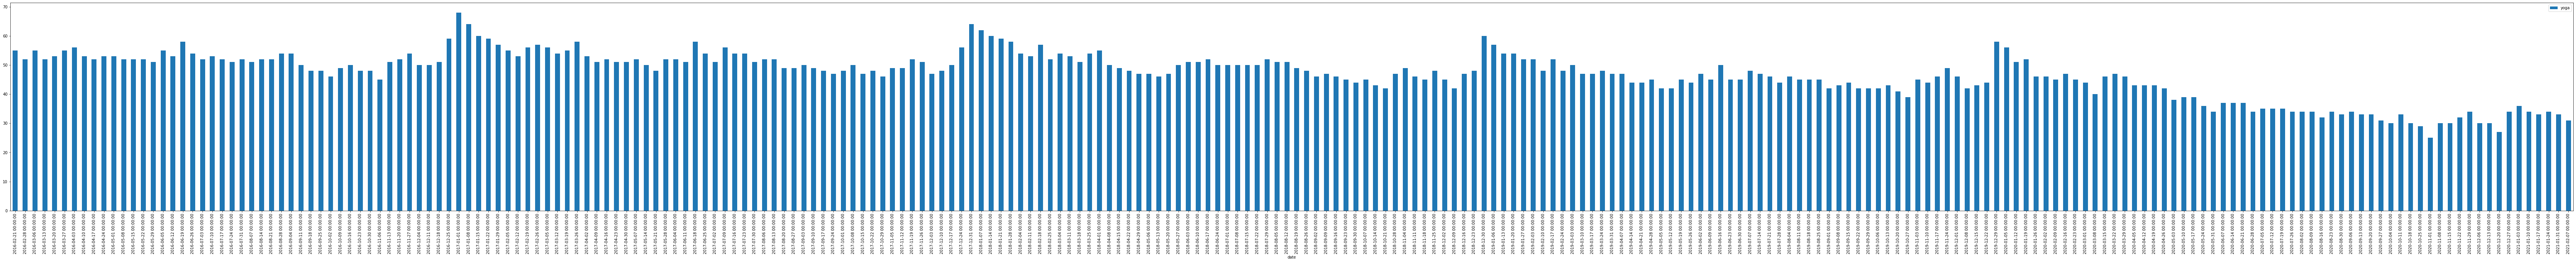

In [ ]:
df_over_time.reset_index().plot(x='date', y='yoga', figsize=(120, 10), kind ='bar')

### Getting region specifc data

We can also get region specifc data from the payload.   



In [ ]:
# Interest by Region
df_interest_by_region = pytrend.interest_by_region()
print(df_interest_by_region.shape)
df_interest_by_region.tail(22)

(51, 5)


,cookie,hiit,cardio,yoga,meditation
geoName,,,,,
New Hampshire,32,1,4,52,11
New Jersey,34,2,5,48,11
New Mexico,31,1,5,52,11
New York,30,2,5,53,10
North Carolina,38,2,5,46,9
North Dakota,45,2,5,41,7
Ohio,43,1,5,43,8
Oklahoma,47,2,5,39,7
Oregon,32,1,4,52,11


<AxesSubplot:xlabel='geoName'>

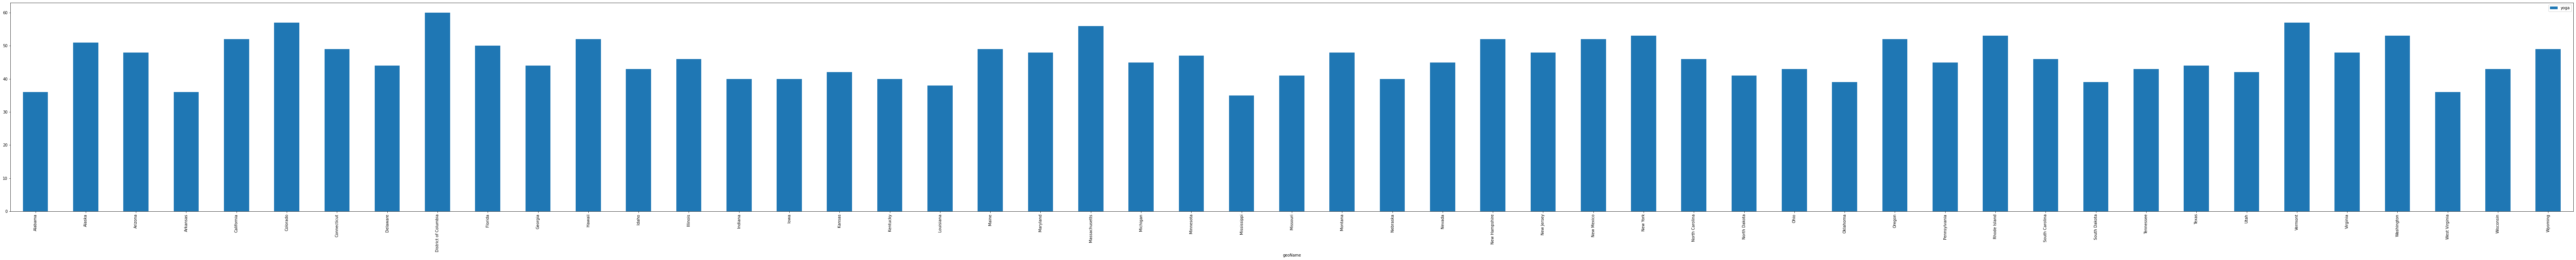

In [ ]:
df_interest_by_region.reset_index().plot(x='geoName', y='yoga', figsize=(120, 10), kind ='bar')

### Related Queries

It's a common thing that when a user searches for a topic, they would also search for something related. These are called related queries.

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries_dict = pytrend.related_queries()
print(related_queries_dict)

{'cookie': {'top':                            query  value
0                  cookie recipe    100
1                   cookie dough     54
2                        cookies     52
3                   sugar cookie     44
4                 cookie clicker     43
5          chocolate chip cookie     40
6                 cookie recipes     28
7        chocolate cookie recipe     27
8            sugar cookie recipe     25
9   chocolate chip cookie recipe     24
10                 cookie butter     24
11                cookie monster     22
12                   cookie cake     21
13                 cookie cutter     15
14                    cookie jar     14
15                fortune cookie     12
16                cookie cutters     11
17          peanut butter cookie     11
18               american cookie     11
19                     cookie do     10
20          butter cookie recipe     10
21                  cookie swirl     10
22                cookie company      9
23                 su

## Daily Search Trends

Now let us get the top daily search trends worldwide. To do this we have to use the `trending_searches()` method. If you want to search worldwide just don't pass any parameter.

In [ ]:
# Get Google Trends data
trending_searches_df = pytrend.trending_searches()
print(trending_searches_df.head())

                  0
0             Oncor
1   Vincent Jackson
2           Chelsea
3  Champions League
4         Generator


### Countries other than the US

If you want a country other than the US, make sure you enter the country name in lowercase `pn = "canada"` . Also, you can compare the above results with the [google trend's result](https://trends.google.com/trends/trendingsearches/daily?geo=US). To get today's trending topics just use:

In [ ]:
# Get Google canada Trends data
df = pytrend.trending_searches(pn='canada')
print(df.shape)
df.head(11)

(20, 1)


,0
0,Alex Galchenyuk
1,Vincent Jackson
2,Senators vs Maple Leafs
3,Texas weather
4,Anthony Davis
5,Andre Drummond
6,Megan Fox
7,Mike Ward
8,Chelsea
9,Raymond Lévesque




---



## Top Charts

Let us see what was trending in 2020. With the help of `top_charts` method we can get the top trending searches yearly.

In [ ]:
# Get Google Top Charts
top_charts_df = pytrend.top_charts(2020, hl='en-US', tz=365, geo='GLOBAL')
print(top_charts_df.shape)
print(top_charts_df.head())

(10, 2)
              title exploreQuery
0       Coronavirus             
1  Election results             
2       Kobe Bryant             
3              Zoom             
4               IPL             


To compare the results just visit [Google Trends](https://trends.google.com/trends/yis/2019/GLOBAL/). We can specify the year and the country that we want to see the trending searches.



---



### Google Keyword Suggestions

Let us see how can we obtain google's keyword suggestion. This is our main tool to expand our search.

![explore yoga](https://github.com/nikbearbrown/ARTG_5430/blob/main/Google_Trends_API/explore_yoga.png?raw=true)

In [ ]:
# Get Google Keyword Suggestions
# Get Google Keyword Suggestions
keywords_dict = pytrend.suggestions(keyword='yoga')
keywords_dict

[{'mid': '/m/087zy', 'title': 'Yoga', 'type': 'Discipline'},
 {'mid': '/g/11ddzx9k58', 'title': 'Lenovo Yoga', 'type': 'Laptop'},
 {'mid': '/m/04vb6k', 'title': 'Yoga', 'type': 'Topic'},
 {'mid': '/m/0gp8df', 'title': 'Yograj Singh', 'type': 'Indian actor'},
 {'mid': '/g/11b6q1wd_n', 'title': 'Lenovo Yoga Tablet', 'type': 'Topic'}]

### Create a Pandas dataframe from a python dictionary

Creating a Pandas dataframe from a python dictionary will make saving a visualizing easier.

In [ ]:
df = pd.DataFrame(keywords_dict)
df.drop(columns= 'mid')   # This column makes no sense
print(df.shape)
df

(5, 3)


,mid,title,type
0,/m/087zy,Yoga,Discipline
1,/g/11ddzx9k58,Lenovo Yoga,Laptop
2,/m/04vb6k,Yoga,Topic
3,/m/0gp8df,Yograj Singh,Indian actor
4,/g/11b6q1wd_n,Lenovo Yoga Tablet,Topic


### Related Topics and Queries

It's a common thing that when a user searches for a topic or keyword, they would also search for something related. 

We need to rebuild the payload for just one keyword for related topics and queries. Always remember when you want to change the topic name you need to rebuild the payload. 

In [ ]:
pytrend.build_payload(kw_list=['yoga'],timeframe='today 5-y', geo='US')

### Related Topics

Finding related topics will also help expand the keyword search.



In [ ]:
# Related Topics, returns a dictionary of dataframes
related_topics = pytrend.related_topics()
related_topics.values()

dict_values([{'rising':     value formattedValue                                               link  \
0   19800       Breakout  /trends/explore?q=/g/11ghvlm2yr&date=today+5-y...   
1   18250       Breakout  /trends/explore?q=/g/11cn0swxyn&date=today+5-y...   
2   17800       Breakout  /trends/explore?q=/g/11ghw1x72z&date=today+5-y...   
3   15900       Breakout  /trends/explore?q=/g/11f67zll7h&date=today+5-y...   
4   14900       Breakout  /trends/explore?q=/g/11g6y71gtd&date=today+5-y...   
5   14450       Breakout  /trends/explore?q=/g/11fzc8dld5&date=today+5-y...   
6    6650       Breakout   /trends/explore?q=/m/03fwl&date=today+5-y&geo=US   
7    3700        +3,700%  /trends/explore?q=/g/11h0y8jh0h&date=today+5-y...   
8    3350        +3,350%  /trends/explore?q=/g/11j322rq77&date=today+5-y...   
9    1000        +1,000%  /trends/explore?q=/g/11vm5dv0d&date=today+5-y&...   
10   1000        +1,000%  /trends/explore?q=/g/11f358fw30&date=today+5-y...   
11    400          +400%  /t

In [ ]:
# Related Queries, returns a dictionary of dataframes
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                 query  value
0          yoga pants    100
1            hot yoga     80
2        yoga near me     56
3          yoga poses     55
4              lenovo     49
5         lenovo yoga     47
6            yoga mat     42
7          power yoga     34
8        yoga classes     31
9         bikram yoga     30
10          yoga pose     29
11        yoga studio     29
12     corepower yoga     23
13         yoga class     23
14       youtube yoga     22
15       what is yoga     22
16       adriene yoga     21
17          kids yoga     21
18          free yoga     20
19          core yoga     20
20  yoga with adriene     17
21    core power yoga     15
22       yoga workout     15
23     beginners yoga     14
24           alo yoga     13, 'rising':                         query  value
0             lenovo yoga 720  15400
1             lenovo yoga 710  14100
2             lenovo yoga 730   9650
3           goat yoga near me   8400
4             lenovo yoga 920

Reach out if you have questions.  Nik Bear Brown [https://www.linkedin.com/in/nikbearbrown/](https://www.linkedin.com/in/nikbearbrown/)